In [ ]:
import os
import numpy as np
import pandas as pd
import nibabel as nib
from radiomics import featureextractora
from tqdm import tqdm

# Set paths for each dataset
datasets = [
    {"set": "train", "img_dir": r"/content/sample_data/train_10_CT", "mask_dir": r"/content/sample_data/train_mask_generate"},
#     {"set": "test", "img_dir": r"/content/sample_data/test_10_CT", "mask_dir": r"/content/sample_data/test_10_mask"}
# ]
]

# Initialize PyRadiomics feature extractor
extractor = featureextractor.RadiomicsFeatureExtractor()
extractor.enableAllFeatures()  # enable all feature classes

# Function to calculate voxel-based features
def extract_voxel_features(image_data):
    data = image_data[image_data > 0]  # ignore background
    stats = {
        "mean_intensity": np.mean(data),
        "std_intensity": np.std(data),
        "min_intensity": np.min(data),
        "max_intensity": np.max(data),
        "skewness": pd.Series(data.ravel()).skew(),
        "kurtosis": pd.Series(data.ravel()).kurt(),
        "nonzero_voxels": len(data),
        "volume_size": image_data.size,
    }

    # Histogram features
    hist, _ = np.histogram(data, bins=20)
    hist_features = {f"hist_bin_{i}": v for i, v in enumerate(hist)}

    return {**stats, **hist_features}

# Process each dataset (train/test)
all_results = []

for dataset in datasets:
    print(f"\n🔍 Processing {dataset['set']} set...")
    image_folder = dataset["img_dir"]
    mask_folder = dataset["mask_dir"]

    for filename in tqdm(os.listdir(image_folder)):
        if not filename.endswith(".nii") and not filename.endswith(".nii.gz"):
            continue

        image_path = os.path.join(image_folder, filename)
        mask_path = os.path.join(mask_folder, filename)

        if not os.path.exists(mask_path):
            print(f"⚠ Mask not found for {filename}, skipping.")
            continue

        try:
            # Load image for voxel-level stats
            image_nii = nib.load(image_path)
            image_data = image_nii.get_fdata()

            # Radiomic features
            rad_features = extractor.execute(image_path, mask_path)
            rad_clean = {k: v for k, v in rad_features.items() if "diagnostics" not in k}

            # Voxel features
            voxel_features = extract_voxel_features(image_data)

            # Combine all
            combined = {
                "Image": filename,
                "Set": dataset["set"],
                **rad_clean,
                **voxel_features
            }

            all_results.append(combined)

        except Exception as e:
            print(f"❌ Error with {filename}: {e}")

# Create DataFrame and Save
df = pd.DataFrame(all_results)
df.to_csv("liver_tumor_combined_features.csv", index=False)
print("\n✅ All features extracted and saved to 'liver_tumor_combined_features.csv'")


INFO:radiomics.featureextractor:No valid config parameter, using defaults: {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 1, 'additionalInfo': True}
INFO:radiomics.featureextractor:Enabled image types: {'Original': {}}
INFO:radiomics.featureextractor:Enabled features: {'firstorder': [], 'glcm': [], 'gldm': [], 'glrlm': [], 'glszm': [], 'ngtdm': [], 'shape': []}



🔍 Processing train set...


100%|██████████| 5/5 [00:00<00:00, 5632.96it/s]

⚠ Mask not found for volume-2.nii, skipping.
⚠ Mask not found for volume-1.nii, skipping.
⚠ Mask not found for volume-5.nii, skipping.
⚠ Mask not found for volume-3.nii, skipping.
⚠ Mask not found for volume-4.nii, skipping.

✅ All features extracted and saved to 'liver_tumor_combined_features.csv'


In [ ]:
!pip install pyradiomics


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 19.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Discarding https://files.pythonhosted.org/packages/03/c1/20fc2c50ab1e3304da36d866042a1905a2b05a1431ece35448ab6b4578f2/pyradiomics-3.1.0.tar.gz (from https://pypi.org/simple/pyradiomics/): Requested pyradiomics from https://files.pythonhosted.org/packages/03/c1/20fc2c50ab1e3304da36d866042a1905a2b05a1431ece35448ab6b4578f2/pyradiomics-3.1.0.tar.gz has inconsistent version: expected '3.1.0', but metadata has '3.0.1a1'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 13.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 80.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.3/52.3 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117

In [ ]:
import os
print(os.listdir("/content/sample_data/train_10_mask"))



['segmentation-3.nii', 'segmentation-1.nii', '.ipynb_checkpoints', 'segmentation-4.nii', 'segmentation-2.nii', 'segmentation-5.nii']


In [ ]:
image_path = '/content/sample_data/train_10_CT/volume-1.nii'
mask_path = ''  # or whatever you expect


print("Image Exists:", os.path.exists(image_path))
print("Mask Exists:", os.path.exists(mask_path))


Image Exists: True
Mask Exists: False


In [ ]:
import os
import numpy as np
import pandas as pd
import nibabel as nib
from tqdm import tqdm
from scipy.stats import skew, kurtosis
from scipy.ndimage import sobel
from scipy.fft import fftn
from scipy.ndimage import generic_filter

# Path to your CT images folder (train set)
train_image_folder = "/content/sample_data/train_10_CT"

# Function to compute texture entropy
def compute_entropy(data):
    hist, _ = np.histogram(data, bins=256, density=True)
    hist = hist[hist > 0]
    return -np.sum(hist * np.log2(hist))

# Function to compute texture contrast, homogeneity, correlation
def compute_texture_metrics(data):
    mean_val = np.mean(data)
    contrast = np.mean((data - mean_val) ** 2)
    homogeneity = np.mean(1 / (1 + np.abs(data - mean_val)))
    correlation = np.corrcoef(data.ravel(), data.ravel())[0, 1]  # Self-correlation
    return contrast, homogeneity, correlation

# Function to compute gradient features
def compute_gradient_features(data):
    dx = sobel(data, axis=0)
    dy = sobel(data, axis=1)
    dz = sobel(data, axis=2)
    gradient_magnitude = np.sqrt(dx**2 + dy**2 + dz**2)
    return {
        "gradient_mean": np.mean(gradient_magnitude),
        "gradient_std": np.std(gradient_magnitude),
        "gradient_max": np.max(gradient_magnitude)
    }

# Function to compute Fourier domain features
def compute_frequency_features(data):
    freq_domain = np.abs(fftn(data))
    total_energy = np.sum(freq_domain**2)
    high_freq_energy = np.sum(freq_domain[int(freq_domain.shape[0]/2):]**2)
    return {
        "frequency_total_energy": total_energy,
        "frequency_high_energy_ratio": high_freq_energy / total_energy if total_energy != 0 else 0
    }

# Full extraction function
def extract_features(image_data):
    data = image_data[image_data > 0]  # ignore background

    stats = {
        "mean_intensity": np.mean(data),
        "std_intensity": np.std(data),
        "min_intensity": np.min(data),
        "max_intensity": np.max(data),
        "skewness": skew(data.ravel()),
        "kurtosis": kurtosis(data.ravel()),
        "nonzero_voxels": len(data),
        "volume_size": image_data.size,
    }

    # Histogram features
    hist, _ = np.histogram(data, bins=20)
    hist_features = {f"hist_bin_{i}": v for i, v in enumerate(hist)}

    # Texture features
    entropy = compute_entropy(data)
    contrast, homogeneity, correlation = compute_texture_metrics(data)
    texture_features = {
        "entropy": entropy,
        "contrast": contrast,
        "homogeneity": homogeneity,
        "correlation": correlation
    }

    # Gradient features
    gradient_features = compute_gradient_features(image_data)

    # Frequency domain features
    frequency_features = compute_frequency_features(image_data)

    return {**stats, **hist_features, **texture_features, **gradient_features, **frequency_features}

# Process training set
all_results = []

print("\n🔍 Processing train set...")

for filename in tqdm(os.listdir(train_image_folder)):
    if not filename.endswith(".nii") and not filename.endswith(".nii.gz"):
        continue

    image_path = os.path.join(train_image_folder, filename)

    try:
        image_nii = nib.load(image_path)
        image_data = image_nii.get_fdata()

        features = extract_features(image_data)

        combined = {
            "Image": filename,
            **features
        }

        all_results.append(combined)

    except Exception as e:
        print(f"❌ Error processing {filename}: {e}")

# Save as CSV
df = pd.DataFrame(all_results)
df.to_csv("train_set_full_features.csv", index=False)

print("\n✅ All features extracted and saved to 'train_set_full_features.csv'")



🔍 Processing train set...


100%|██████████| 5/5 [03:41<00:00, 44.23s/it]


✅ All features extracted and saved to 'train_set_full_features.csv'



📊 Plotting histograms...


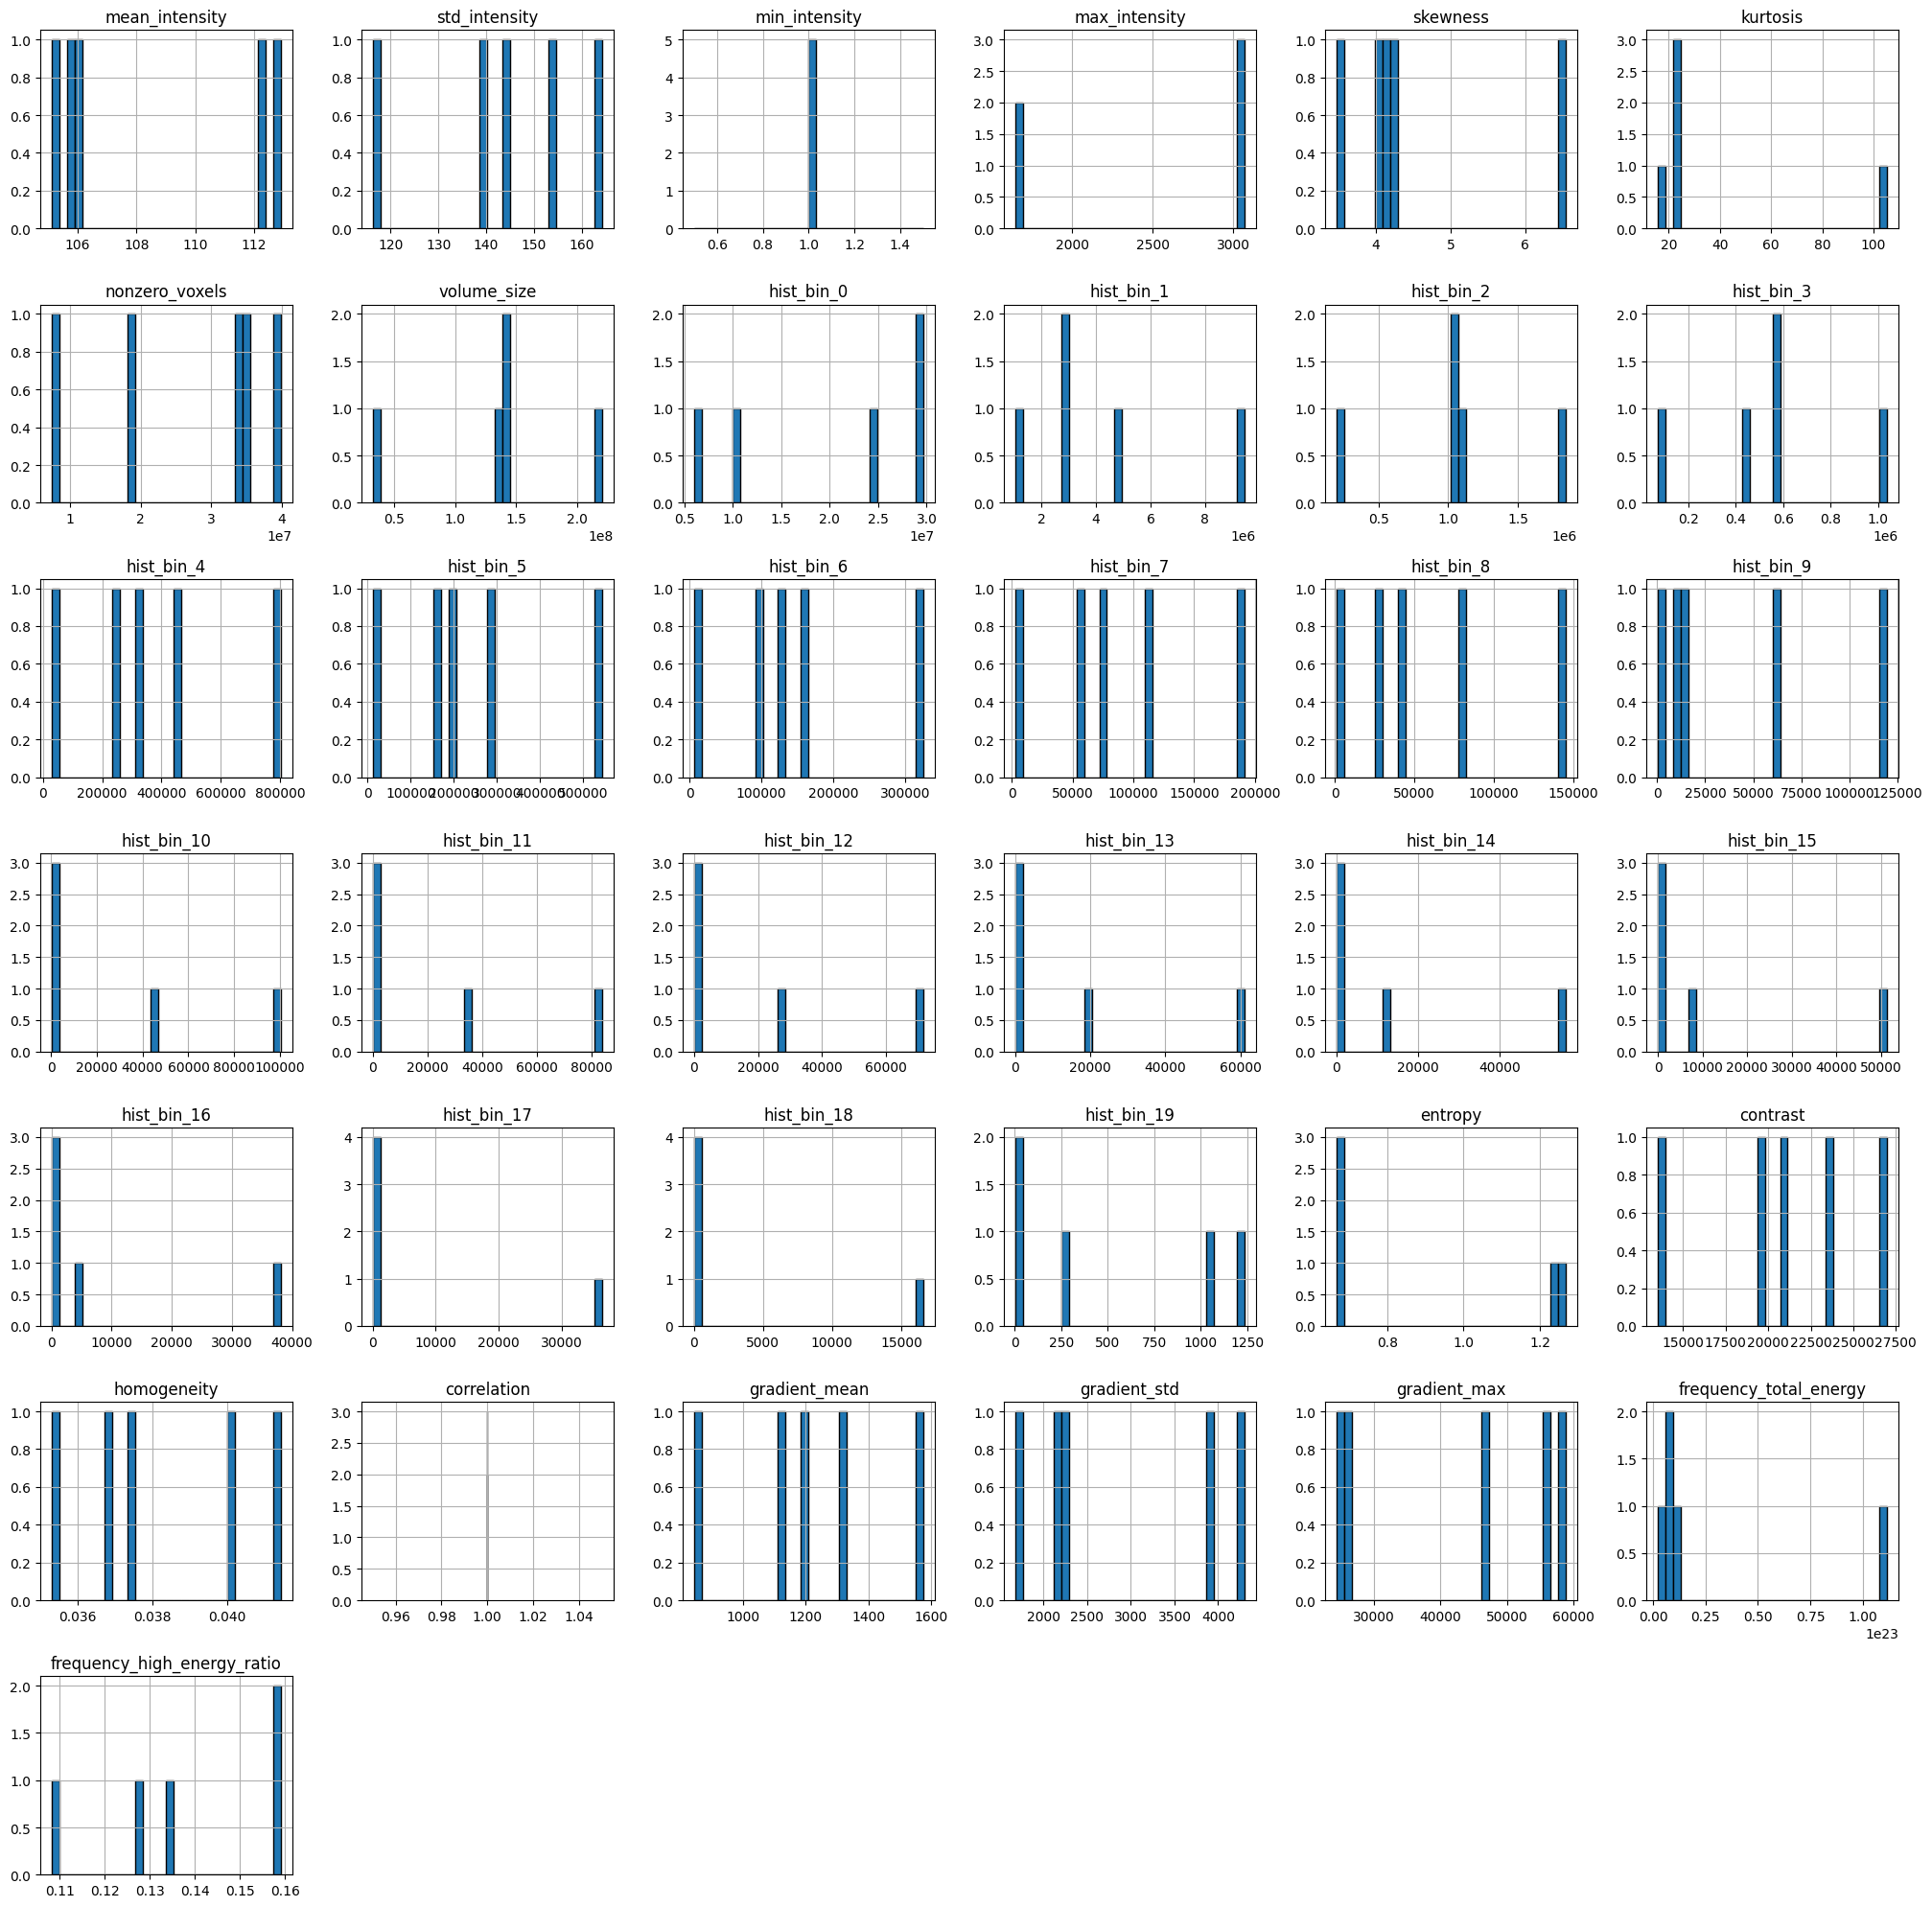


🔥 Correlation Heatmap...


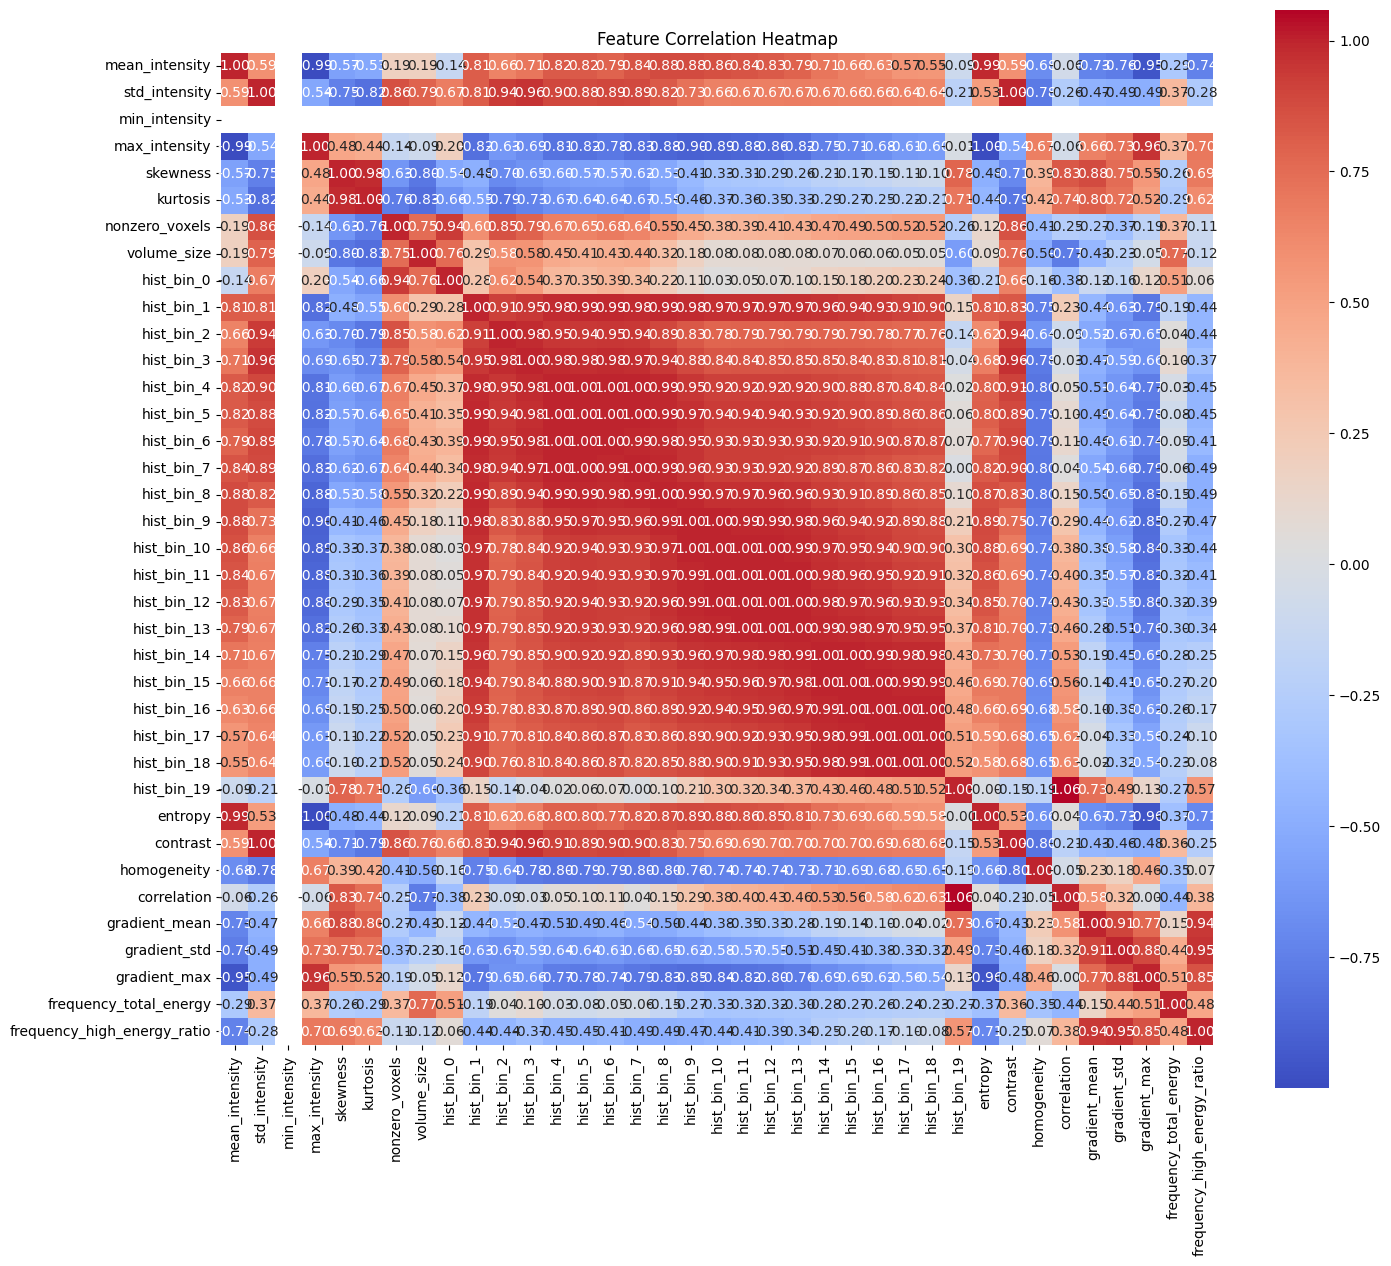

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV you just generated
df = pd.read_csv("train_set_full_features.csv")

# Drop the Image column (non-numeric)
features_only = df.drop(columns=["Image"])

# Create Histograms for all features
print("\n📊 Plotting histograms...")
features_only.hist(figsize=(20, 20), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()

# Create Correlation Heatmap
print("\n🔥 Correlation Heatmap...")
plt.figure(figsize=(16, 14))
sns.heatmap(features_only.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Feature Correlation Heatmap")
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


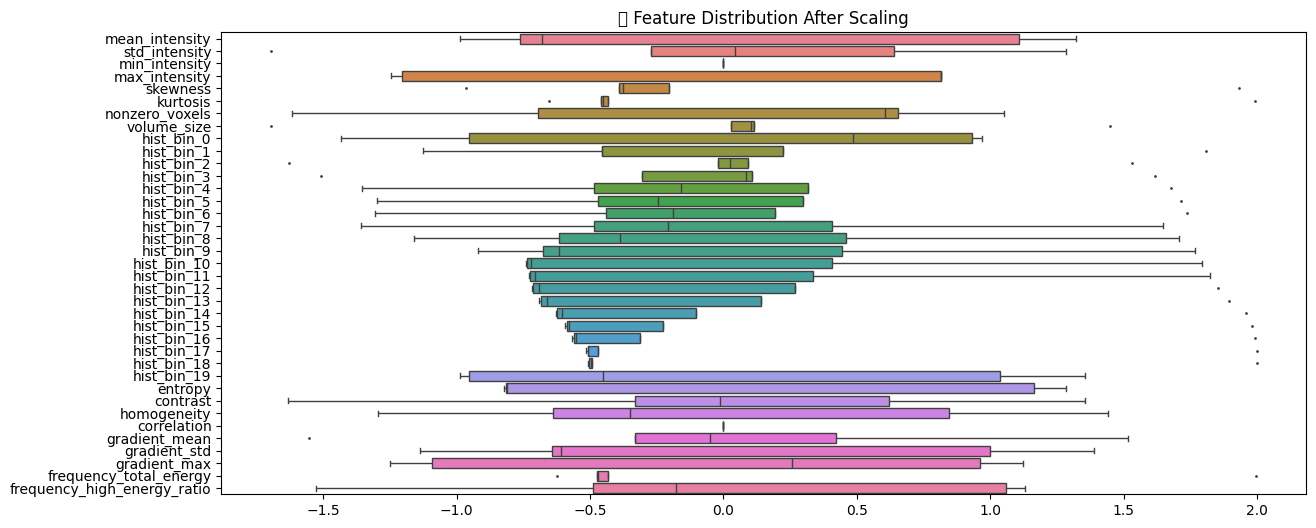

✅ PCA reduced dimensions from 37 to 3
💾 Preprocessed features saved to 'train_set_preprocessed_features.csv'


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load extracted features
df = pd.read_csv("/train_set_full_features.csv")

# Drop identifier columns
df_clean = df.drop(columns=['Image'])

# Check for missing values
if df_clean.isnull().sum().sum() > 0:
    print("⚠️ Found missing values! Filling with median.")
    df_clean = df_clean.fillna(df_clean.median())

# Feature Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_clean)

# Convert back to DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=df_clean.columns)

# Plot to check distributions after scaling
plt.figure(figsize=(14, 6))
sns.boxplot(data=scaled_df, orient='h', fliersize=1)
plt.title("📦 Feature Distribution After Scaling")
plt.show()

# Dimensionality Reduction with PCA (optional)
pca = PCA(n_components=0.95)  # keep 95% of variance
pca_features = pca.fit_transform(scaled_features)

print(f"✅ PCA reduced dimensions from {scaled_features.shape[1]} to {pca_features.shape[1]}")

# Save preprocessed features
preprocessed_df = pd.DataFrame(pca_features)
preprocessed_df.to_csv("train_set_preprocessed_features.csv", index=False)
print("💾 Preprocessed features saved to 'train_set_preprocessed_features.csv'")


In [ ]:
!pip install nibabel numpy scipy scikit-image matplotlib


✅ Processed: volume-2.nii
✅ Processed: volume-1.nii
❌ Error with volume-5.nii: Expected 281542656 bytes, got 187694752 bytes from /content/sample_data/train_5_ctt/volume-5.nii
 - could the file be damaged?
✅ Processed: volume-3.nii
❌ Error with volume-4.nii: Expected 440926208 bytes, got 239074976 bytes from /content/sample_data/train_5_ctt/volume-4.nii
 - could the file be damaged?
All images shape: (3, 128, 128, 128)
✅ Preprocessed images saved as 'processed_images.npy'
✅ Flattened images saved as 'processed_images.csv' (Excel-friendly)


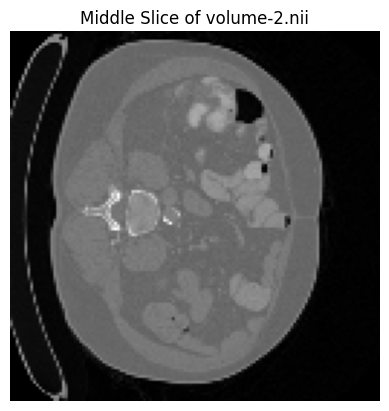

In [ ]:
# Install necessary libraries
!pip install nibabel numpy scipy scikit-image matplotlib pandas scikit-learn

# Import libraries
import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from scipy.ndimage import zoom
import pandas as pd
from sklearn.model_selection import train_test_split

# Define a loader and preprocessor function
def load_and_preprocess_nii(file_path, target_shape=(128, 128, 128)):
    # Load NIfTI image
    nii = nib.load(file_path)
    image = nii.get_fdata()

    # Normalize image to [0,1]
    image = (image - np.min(image)) / (np.max(image) - np.min(image) + 1e-8)

    # Resize image
    zoom_factors = np.array(target_shape) / np.array(image.shape)
    resized_image = zoom(image, zoom_factors, order=1)  # linear interpolation

    return resized_image

# Set directory path
image_folder = '/content/sample_data/train_5_ctt'  # <-- Your folder path

# Loop through the directory and process images
all_images = []
image_names = []

for filename in os.listdir(image_folder):
    if filename.endswith(".nii") or filename.endswith(".nii.gz"):
        try:
            file_path = os.path.join(image_folder, filename)
            processed_image = load_and_preprocess_nii(file_path)
            all_images.append(processed_image)
            image_names.append(filename)
            print(f"✅ Processed: {filename}")
        except Exception as e:
            print(f"❌ Error with {filename}: {e}")

# Convert list to numpy array
all_images = np.array(all_images)
print("All images shape:", all_images.shape)  # should be (num_samples, 128, 128, 128)

# Save as .npy for model input
np.save('processed_images.npy', all_images)
print("✅ Preprocessed images saved as 'processed_images.npy'")

# Flatten for CSV export
flattened_images = [img.flatten() for img in all_images]
df = pd.DataFrame(flattened_images)
df.insert(0, 'Image', image_names)  # add filenames as first column
df.to_csv('processed_images.csv', index=False)
print("✅ Flattened images saved as 'processed_images.csv' (Excel-friendly)")

# Show a sample middle slice
if len(all_images) > 0:
    plt.imshow(all_images[0][:, :, all_images[0].shape[2] // 2], cmap='gray')
    plt.title(f"Middle Slice of {image_names[0]}")
    plt.axis("off")
    plt.show()


In [ ]:
import os
import numpy as np
import pandas as pd
import nibabel as nib
from radiomics import featureextractor
from tqdm import tqdm

# Set your test folder paths
test_image_folder = "/content/sample_data/test_5_ctt"
# test_mask_folder = "/content/sample_data/test_10_mask"  # if masks are available

# Initialize PyRadiomics extractor
extractor = featureextractor.RadiomicsFeatureExtractor()
extractor.enableAllFeatures()

# Store results
test_results = []

for filename in tqdm(os.listdir(test_image_folder)):
    if not (filename.endswith(".nii") or filename.endswith(".nii.gz")):
        continue

    image_path = os.path.join(test_image_folder, filename)
    # mask_path = os.path.join(test_mask_folder, filename)  # assuming same name masks

    if not os.path.exists(mask_path):
        print(f"⚠️ Mask not found for {filename}, skipping.")
        continue

    try:
        # Load image
        image_nii = nib.load(image_path)
        image_data = image_nii.get_fdata()
        non_zero_data = image_data[image_data > 0]

        # Basic voxel-level features
        voxel_features = {
            "Image": filename,
            "mean_intensity": np.mean(non_zero_data),
            "std_intensity": np.std(non_zero_data),
            "min_intensity": np.min(non_zero_data),
            "max_intensity": np.max(non_zero_data),
            "skewness": pd.Series(non_zero_data.ravel()).skew(),
            "kurtosis": pd.Series(non_zero_data.ravel()).kurt(),
            "nonzero_voxels": len(non_zero_data),
            "volume_size": image_data.size
        }

        # Histogram features
        hist, _ = np.histogram(non_zero_data, bins=20)
        hist_features = {f"hist_bin_{i}": v for i, v in enumerate(hist)}

        # Radiomics features
        rad_features = extractor.execute(image_path, mask_path)
        rad_clean = {k: v for k, v in rad_features.items() if "diagnostics" not in k}

        # Combine all
        combined_features = {**voxel_features, **hist_features, **rad_clean}
        test_results.append(combined_features)

    except Exception as e:
        print(f"❌ Error processing {filename}: {e}")

# Save to CSV
df_test = pd.DataFrame(test_results)
df_test.to_csv("test_features.csv", index=False)
print("\n✅ Test set features saved to 'test_features.csv'")


ModuleNotFoundError: No module named 'radiomics'

In [ ]:
!pip install pyradiomics



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 43.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Discarding https://files.pythonhosted.org/packages/03/c1/20fc2c50ab1e3304da36d866042a1905a2b05a1431ece35448ab6b4578f2/pyradiomics-3.1.0.tar.gz (from https://pypi.org/simple/pyradiomics/): Requested pyradiomics from https://files.pythonhosted.org/packages/03/c1/20fc2c50ab1e3304da36d866042a1905a2b05a1431ece35448ab6b4578f2/pyradiomics-3.1.0.tar.gz has inconsistent version: expected '3.1.0', but metadata has '3.0.1a1'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 16.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 43.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.3/52.3 MB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117

In [ ]:
import os
import numpy as np
import pandas as pd
import nibabel as nib
from radiomics import featureextractor
from tqdm import tqdm

# Set your test folder paths
test_image_folder = "/content/sample_data/test_5_ctt"
# test_mask_folder = "/content/sample_data/test_10_mask"  # if masks are available

# Initialize PyRadiomics extractor
extractor = featureextractor.RadiomicsFeatureExtractor()
extractor.enableAllFeatures()

# Store results
test_results = []

for filename in tqdm(os.listdir(test_image_folder)):
    if not (filename.endswith(".nii") or filename.endswith(".nii.gz")):
        continue

    image_path = os.path.join(test_image_folder, filename)
    # mask_path = os.path.join(test_mask_folder, filename)  # assuming same name masks

    # if not os.path.exists(mask_path):
    #     print(f"⚠️ Mask not found for {filename}, skipping.")
    #     continue

    try:
        # Load image
        image_nii = nib.load(image_path)
        image_data = image_nii.get_fdata()
        non_zero_data = image_data[image_data > 0]

        # Basic voxel-level features
        voxel_features = {
            "Image": filename,
            "mean_intensity": np.mean(non_zero_data),
            "std_intensity": np.std(non_zero_data),
            "min_intensity": np.min(non_zero_data),
            "max_intensity": np.max(non_zero_data),
            "skewness": pd.Series(non_zero_data.ravel()).skew(),
            "kurtosis": pd.Series(non_zero_data.ravel()).kurt(),
            "nonzero_voxels": len(non_zero_data),
            "volume_size": image_data.size
        }

        # Histogram features
        hist, _ = np.histogram(non_zero_data, bins=20)
        hist_features = {f"hist_bin_{i}": v for i, v in enumerate(hist)}

        # Radiomics features
        rad_features = extractor.execute(image_path, mask_path)
        rad_clean = {k: v for k, v in rad_features.items() if "diagnostics" not in k}

        # Combine all
        combined_features = {**voxel_features, **hist_features, **rad_clean}
        test_results.append(combined_features)

    except Exception as e:
        print(f"❌ Error processing {filename}: {e}")

# Save to CSV
df_test = pd.DataFrame(test_results)
df_test.to_csv("test_features.csv", index=False)
print("\n✅ Test set features saved to 'test_features.csv'")


INFO:radiomics.featureextractor:No valid config parameter, using defaults: {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 1, 'additionalInfo': True}
INFO:radiomics.featureextractor:Enabled image types: {'Original': {}}
INFO:radiomics.featureextractor:Enabled features: {'firstorder': [], 'glcm': [], 'gldm': [], 'glrlm': [], 'glszm': [], 'ngtdm': [], 'shape': []}
 33%|███▎      | 1/3 [00:00<00:01,  1.03it/s]

❌ Error processing volume-113.nii: Expected 438304768 bytes, got 334495392 bytes from /content/sample_data/test_5_ctt/volume-113.nii
 - could the file be damaged?


 67%|██████▋   | 2/3 [00:01<00:00,  1.08it/s]

❌ Error processing volume-112.nii: Expected 393740288 bytes, got 339738272 bytes from /content/sample_data/test_5_ctt/volume-112.nii
 - could the file be damaged?


100%|██████████| 3/3 [00:02<00:00,  1.11it/s]

❌ Error processing volume-111.nii: Expected 398983168 bytes, got 334495392 bytes from /content/sample_data/test_5_ctt/volume-111.nii
 - could the file be damaged?

✅ Test set features saved to 'test_features.csv'


In [ ]:
import pandas as pd
import numpy as np

# Load your train CSV
train_df = pd.read_csv("/content/train_set_full_features.csv")

# Create mock test data
test_images = ['test_volume_1.nii', 'test_volume_2.nii', 'test_volume_3.nii', 'test_volume_4.nii', 'test_volume_5.nii']

# Sample 5 entries from train and modify slightly
mock_test_df = train_df.sample(n=5, replace=True).reset_index(drop=True)
mock_test_df['Image'] = test_images

# Add small random variation to simulate new test data
np.random.seed(42)  # So you get repeatable results
for col in mock_test_df.columns:
    if col != 'Image':
        mock_test_df[col] = mock_test_df[col] * (1 + np.random.uniform(-0.05, 0.05, len(mock_test_df)))

# Save to CSV
mock_test_df.to_csv("/content/test_set_full_features_mock1.csv", index=False)
print("✅ Mock test features saved to 'test_set_full_features_mock.csv'")


✅ Mock test features saved to 'test_set_full_features_mock.csv'


In [ ]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import zoom, rotate


Found 5 NIfTI files
Processing: /content/sample_data/train_5_ctt/volume-2.nii
Shape: (512, 512, 517)
Data Type: int16
Voxel Dimensions: (np.float32(0.7753906), np.float32(0.7753906), np.float32(1.0))


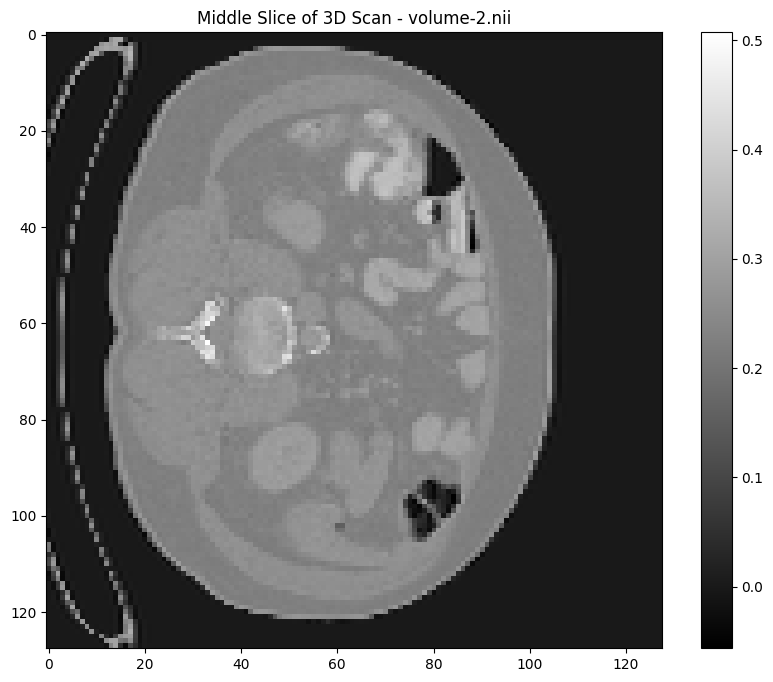

Successfully processed volume-2.nii
Feature Vector Shape: (2097152,)
Processing: /content/sample_data/train_5_ctt/volume-1.nii
Shape: (512, 512, 123)
Data Type: int16
Voxel Dimensions: (np.float32(0.675781), np.float32(0.675781), np.float32(5.0))


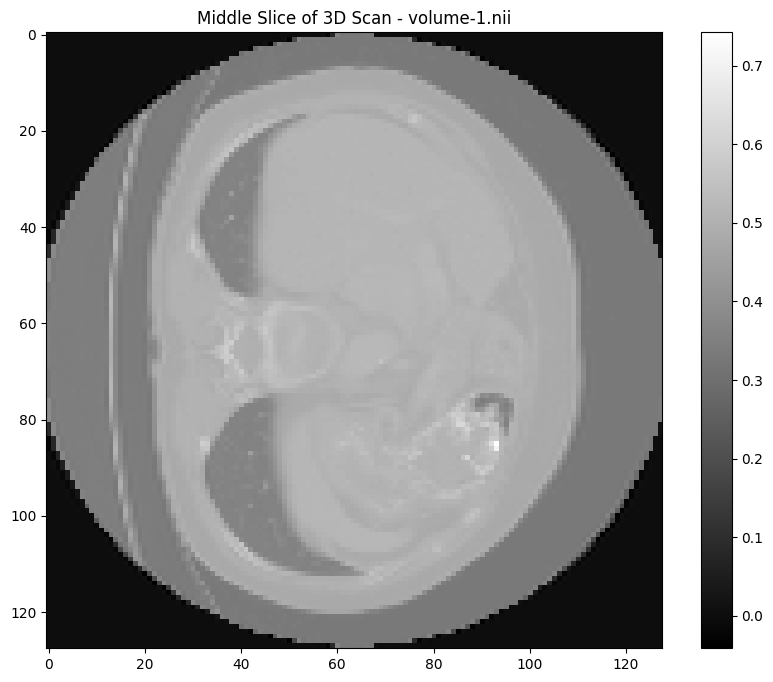

Successfully processed volume-1.nii
Feature Vector Shape: (2097152,)
Processing: /content/sample_data/train_5_ctt/volume-5.nii
Shape: (512, 512, 537)
Data Type: int16
Voxel Dimensions: (np.float32(0.96875), np.float32(0.96875), np.float32(0.799988))
Error processing volume-5.nii: Expected 281542656 bytes, got 187694752 bytes from /content/sample_data/train_5_ctt/volume-5.nii
 - could the file be damaged?
Processing: /content/sample_data/train_5_ctt/volume-3.nii
Shape: (512, 512, 534)
Data Type: int16
Voxel Dimensions: (np.float32(0.6933594), np.float32(0.6933594), np.float32(1.0))


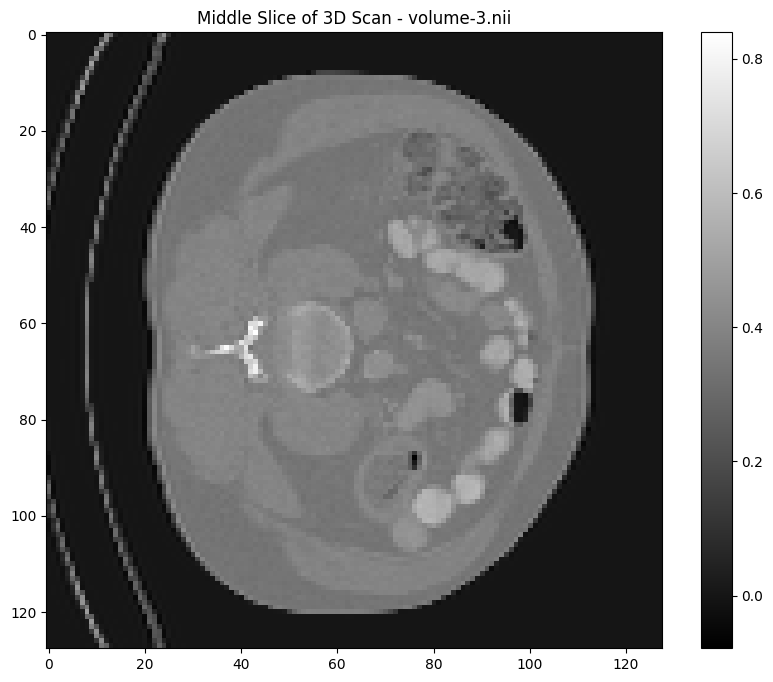

Successfully processed volume-3.nii
Feature Vector Shape: (2097152,)
Processing: /content/sample_data/train_5_ctt/volume-4.nii
Shape: (512, 512, 841)
Data Type: int16
Voxel Dimensions: (np.float32(0.902344), np.float32(0.902344), np.float32(0.8))
Error processing volume-4.nii: Expected 440926208 bytes, got 239074976 bytes from /content/sample_data/train_5_ctt/volume-4.nii
 - could the file be damaged?


In [ ]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import zoom, rotate

# Function to process a single NIfTI file
def process_nifti_file(file_path):
    print(f"Processing: {file_path}")

    # Load the NIfTI file
    nii_image = nib.load(file_path)

    # Extract metadata
    print("Shape:", nii_image.shape)
    print("Data Type:", nii_image.header.get_data_dtype())
    print("Voxel Dimensions:", nii_image.header.get_zooms())

    # Convert to NumPy array
    image_data = np.array(nii_image.get_fdata())

    # Normalize the image data
    image_data = (image_data - np.min(image_data)) / (np.max(image_data) - np.min(image_data))

    # Resize to target shape
    target_shape = (128, 128, 128)  # Desired output shape
    zoom_factors = np.array(target_shape) / np.array(image_data.shape)
    resized_image = zoom(image_data, zoom_factors, order=1)  # Linear interpolation

    # Remove background noise
    threshold = 0.1  # Adjust based on dataset
    resized_image[resized_image < threshold] = 0

    # Rotate image by 15 degrees
    rotated_image = rotate(resized_image, 15, axes=(1, 2), reshape=False)

    # Visualize a middle slice
    plt.figure(figsize=(10, 8))
    plt.imshow(rotated_image[:, :, rotated_image.shape[2] // 2], cmap="gray")
    plt.title(f"Middle Slice of 3D Scan - {os.path.basename(file_path)}")
    plt.colorbar()
    plt.show()

    return rotated_image, nii_image.header

# Folder containing NIfTI files
input_folder = "/content/sample_data/train_5_ctt"  # Change this to your folder path

# Process all NIfTI files in the folder
nifti_files = [f for f in os.listdir(input_folder) if f.endswith('.nii') or f.endswith('.nii.gz')]

if not nifti_files:
    print(f"No NIfTI files found in {input_folder}")
else:
    print(f"Found {len(nifti_files)} NIfTI files")

    # Process each file
    for nifti_file in nifti_files:
        file_path = os.path.join(input_folder, nifti_file)
        try:
            processed_image, header = process_nifti_file(file_path)
            print(f"Successfully processed {nifti_file}")

            # Print feature vector info
            voxel_features = np.ravel(processed_image)
            print("Feature Vector Shape:", voxel_features.shape)

        except Exception as e:
            print(f"Error processing {nifti_file}: {str(e)}")

Found 5 NIfTI files
Processing: /content/sample_data/train_5_ctt/volume-2.nii
Shape: (512, 512, 517)
Data Type: int16
Voxel Dimensions: (np.float32(0.7753906), np.float32(0.7753906), np.float32(1.0))
Original - Mean: 0.1362, Std: 0.1218, Skewness: 0.0800, Kurtosis: -1.6368
Processed - Mean: 0.1230, Std: 0.1274, Skewness: 0.1680, Kurtosis: -1.7046
Feature Vector Shape: (2097152,)


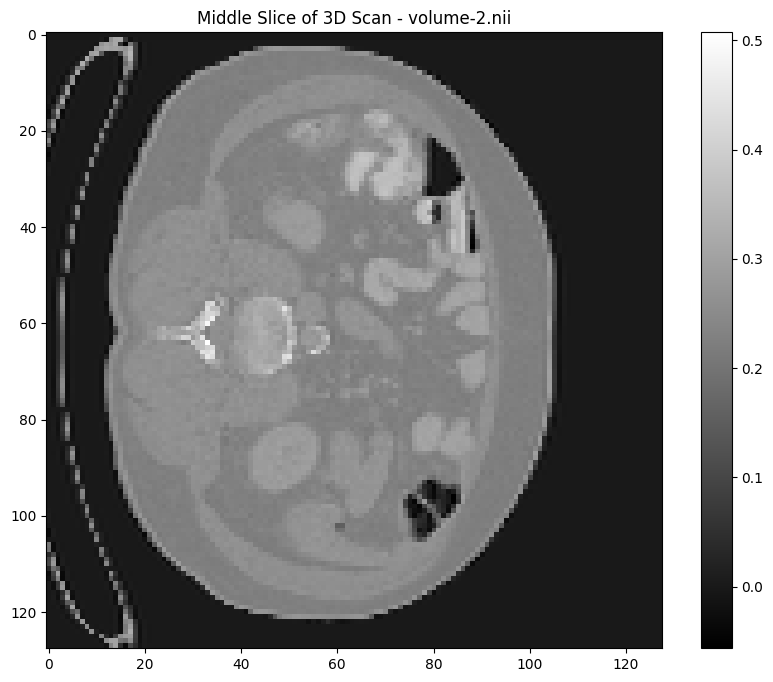

Successfully processed volume-2.nii
--------------------------------------------------
Processing: /content/sample_data/train_5_ctt/volume-1.nii
Shape: (512, 512, 123)
Data Type: int16
Voxel Dimensions: (np.float32(0.675781), np.float32(0.675781), np.float32(5.0))
Original - Mean: 0.3398, Std: 0.1897, Skewness: -0.9475, Kurtosis: -0.5633
Processed - Mean: 0.3166, Std: 0.2051, Skewness: -0.6949, Kurtosis: -1.1594
Feature Vector Shape: (2097152,)


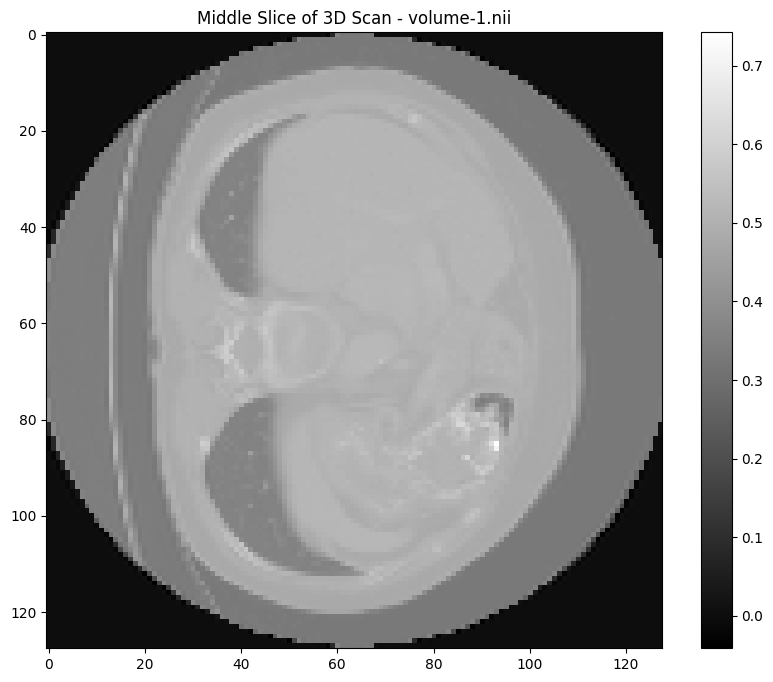

Successfully processed volume-1.nii
--------------------------------------------------
Processing: /content/sample_data/train_5_ctt/volume-5.nii
Shape: (512, 512, 537)
Data Type: int16
Voxel Dimensions: (np.float32(0.96875), np.float32(0.96875), np.float32(0.799988))
Error processing volume-5.nii: Expected 281542656 bytes, got 187694752 bytes from /content/sample_data/train_5_ctt/volume-5.nii
 - could the file be damaged?
--------------------------------------------------
Processing: /content/sample_data/train_5_ctt/volume-3.nii
Shape: (512, 512, 534)
Data Type: int16
Voxel Dimensions: (np.float32(0.6933594), np.float32(0.6933594), np.float32(1.0))
Original - Mean: 0.2165, Std: 0.1858, Skewness: 0.0826, Kurtosis: -1.4510
Processed - Mean: 0.1960, Std: 0.1960, Skewness: 0.1485, Kurtosis: -1.5625
Feature Vector Shape: (2097152,)


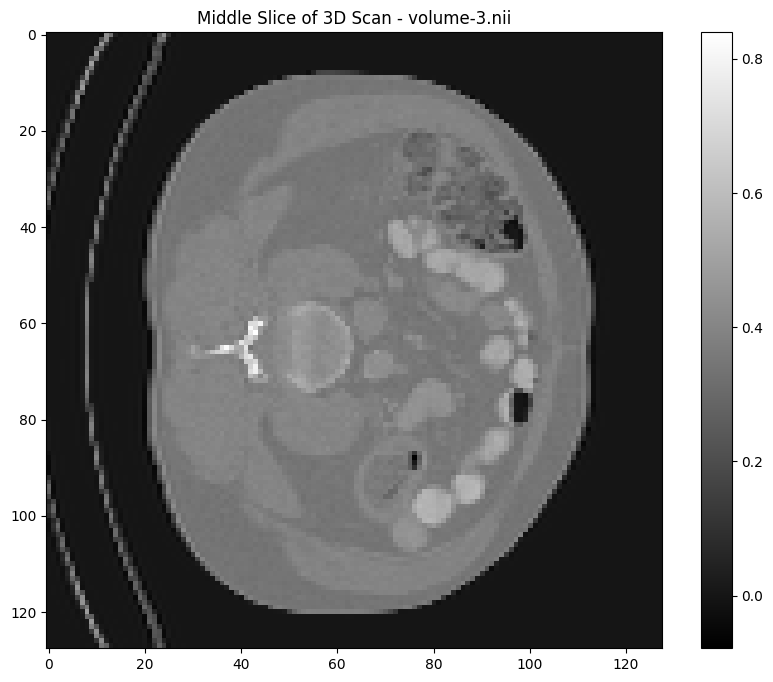

Successfully processed volume-3.nii
--------------------------------------------------
Processing: /content/sample_data/train_5_ctt/volume-4.nii
Shape: (512, 512, 841)
Data Type: int16
Voxel Dimensions: (np.float32(0.902344), np.float32(0.902344), np.float32(0.8))
Error processing volume-4.nii: Expected 440926208 bytes, got 239074976 bytes from /content/sample_data/train_5_ctt/volume-4.nii
 - could the file be damaged?
--------------------------------------------------

STATISTICAL SUMMARY OF ALL PROCESSED FILES
Filename             Mean       StdDev     Skewness   Kurtosis  
--------------------------------------------------------------------------------
volume-2.nii         0.1230     0.1274     0.1680     -1.7046   
volume-1.nii         0.3166     0.2051     -0.6949    -1.1594   
volume-3.nii         0.1960     0.1960     0.1485     -1.5625   


In [ ]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import zoom, rotate
from scipy.stats import skew, kurtosis

# Function to process a single NIfTI file
def process_nifti_file(file_path):
    print(f"Processing: {file_path}")

    # Load the NIfTI file
    nii_image = nib.load(file_path)

    # Extract metadata
    print("Shape:", nii_image.shape)
    print("Data Type:", nii_image.header.get_data_dtype())
    print("Voxel Dimensions:", nii_image.header.get_zooms())

    # Convert to NumPy array
    image_data = np.array(nii_image.get_fdata())

    # Normalize the image data
    image_data = (image_data - np.min(image_data)) / (np.max(image_data) - np.min(image_data))

    # Calculate statistical features on original normalized data
    mean_intensity = np.mean(image_data)
    std_intensity = np.std(image_data)
    skewness = skew(image_data.flatten())
    kurt = kurtosis(image_data.flatten())
    print(f"Original - Mean: {mean_intensity:.4f}, Std: {std_intensity:.4f}, "
          f"Skewness: {skewness:.4f}, Kurtosis: {kurt:.4f}")

    # Resize to target shape
    target_shape = (128, 128, 128)  # Desired output shape
    zoom_factors = np.array(target_shape) / np.array(image_data.shape)
    resized_image = zoom(image_data, zoom_factors, order=1)  # Linear interpolation

    # Remove background noise
    threshold = 0.1  # Adjust based on dataset
    resized_image[resized_image < threshold] = 0

    # Rotate image by 15 degrees
    rotated_image = rotate(resized_image, 15, axes=(1, 2), reshape=False)

    # Calculate statistical features on processed data
    mean_processed = np.mean(rotated_image)
    std_processed = np.std(rotated_image)
    skewness_processed = skew(rotated_image.flatten())
    kurt_processed = kurtosis(rotated_image.flatten())
    print(f"Processed - Mean: {mean_processed:.4f}, Std: {std_processed:.4f}, "
          f"Skewness: {skewness_processed:.4f}, Kurtosis: {kurt_processed:.4f}")

    # Flatten to get feature vector
    voxel_features = np.ravel(rotated_image)
    print("Feature Vector Shape:", voxel_features.shape)

    # Visualize a middle slice
    plt.figure(figsize=(10, 8))
    plt.imshow(rotated_image[:, :, rotated_image.shape[2] // 2], cmap="gray")
    plt.title(f"Middle Slice of 3D Scan - {os.path.basename(file_path)}")
    plt.colorbar()
    plt.show()

    return rotated_image, {
        "mean": mean_processed,
        "std": std_processed,
        "skewness": skewness_processed,
        "kurtosis": kurt_processed,
        "original_mean": mean_intensity,
        "original_std": std_intensity,
        "original_skewness": skewness,
        "original_kurtosis": kurt
    }

# Folder containing NIfTI files
input_folder = "/content/sample_data/train_5_ctt"  # Change this to your folder path

# Process all NIfTI files in the folder
nifti_files = [f for f in os.listdir(input_folder) if f.endswith('.nii') or f.endswith('.nii.gz')]

if not nifti_files:
    print(f"No NIfTI files found in {input_folder}")
else:
    print(f"Found {len(nifti_files)} NIfTI files")

    # Summary table for all files
    results_summary = []

    # Process each file
    for nifti_file in nifti_files:
        file_path = os.path.join(input_folder, nifti_file)
        try:
            processed_image, stats = process_nifti_file(file_path)

            # Add to summary
            stats["filename"] = nifti_file
            results_summary.append(stats)

            print(f"Successfully processed {nifti_file}")
            print("-" * 50)

        except Exception as e:
            print(f"Error processing {nifti_file}: {str(e)}")
            print("-" * 50)

    # Display summary table if multiple files were processed
    if len(results_summary) > 1:
        print("\n" + "=" * 80)
        print("STATISTICAL SUMMARY OF ALL PROCESSED FILES")
        print("=" * 80)
        print(f"{'Filename':<20} {'Mean':<10} {'StdDev':<10} {'Skewness':<10} {'Kurtosis':<10}")
        print("-" * 80)

        for result in results_summary:
            print(f"{result['filename']:<20} "
                  f"{result['mean']:<10.4f} "
                  f"{result['std']:<10.4f} "
                  f"{result['skewness']:<10.4f} "
                  f"{result['kurtosis']:<10.4f}")

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from skimage.transform import resize
from skimage.io import imread
import matplotlib.pyplot as plt

# --- Quantum-Inspired Encoding Function ---
def quantum_inspired_encoding(slice_img, target_size=(64, 64)):
    """
    Applies quantum-inspired sin/cos encoding to a 2D slice.

    Args:
        slice_img (np.ndarray): input 2D image slice
        target_size (tuple): desired resize shape (H, W)

    Returns:
        torch.Tensor: encoded tensor of shape (2, H, W)
    """
    # Resize slice
    slice_resized = resize(slice_img, target_size, preserve_range=True, anti_aliasing=True)

    # Normalize pixel values to [0, π]
    normalized = (slice_resized / np.max(slice_resized)) * np.pi

    # Compute sin and cos features
    sin_feat = np.sin(normalized)
    cos_feat = np.cos(normalized)

    # Stack along channel dimension
    features = np.stack([sin_feat, cos_feat], axis=0)  # Shape: (2, H, W)

    return torch.tensor(features, dtype=torch.float32)

# --- Simple CNN Model ---
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(2, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # Downsample

            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
        )
        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(32 * 16 * 16, 64),  # Adjust based on input size
            nn.ReLU(),
            nn.Linear(64, 2)  # Suppose binary classification (e.g., tumor vs non-tumor)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x

# --- Example Usage ---
if __name__ == "__main__":
    # Suppose you load a 2D middle slice from LiTS
    # slice_img = np.random.rand(512, 512)
    slice_img = imread("/content/quantslice.png", as_gray=True)  # Replace this with your real slice

    # Encode the slice
    encoded_slice = quantum_inspired_encoding(slice_img, target_size=(64, 64))  # shape: (2, 64, 64)

    # Add batch dimension
    encoded_slice = encoded_slice.unsqueeze(0)  # shape: (1, 2, 64, 64)

    # Create dataset and dataloader
    labels = torch.tensor([1])
    dataset = TensorDataset(encoded_slice, labels)
    loader = DataLoader(dataset, batch_size=1, shuffle=True)

    # Create model
    model = SimpleCNN()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Training loop
    for epoch in range(5):
        for data, target in loader:
            optimizer.zero_grad()
            outputs = model(data)
            loss = criterion(outputs, target)
            loss.backward()
            optimizer.step()
        print(f"Epoch {epoch+1} Loss: {loss.item():.4f}")

    # Prediction
    with torch.no_grad():
        output = model(encoded_slice)
        prediction = torch.argmax(output, dim=1)
        print(f"Predicted class: {prediction.item()}")


Epoch 1 Loss: 0.7175
Epoch 2 Loss: 0.1464
Epoch 3 Loss: 0.0172
Epoch 4 Loss: 0.0016
Epoch 5 Loss: 0.0001
Predicted class: 1


In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from skimage.transform import resize
from sklearn.metrics import classification_report, confusion_matrix

# --- Quantum-Inspired Encoding Function ---
def quantum_inspired_encoding(slice_img, target_size=(64, 64)):
    """
    Applies quantum-inspired sin/cos encoding to a 2D slice.

    Args:
        slice_img (np.ndarray): input 2D image slice
        target_size (tuple): desired resize shape (H, W)

    Returns:
        torch.Tensor: encoded tensor of shape (2, H, W)
    """
    # Resize slice
    slice_resized = resize(slice_img, target_size, preserve_range=True, anti_aliasing=True)

    # Normalize pixel values to [0, π]
    normalized = (slice_resized / np.max(slice_resized)) * np.pi

    # Compute sin and cos features
    sin_feat = np.sin(normalized)
    cos_feat = np.cos(normalized)

    # Stack along channel dimension
    features = np.stack([sin_feat, cos_feat], axis=0)  # Shape: (2, H, W)

    return torch.tensor(features, dtype=torch.float32)

# --- Enhanced CNN Model for Three-Class Classification ---
class EnhancedCNN(nn.Module):
    def __init__(self):
        super(EnhancedCNN, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(2, 16, kernel_size=3, stride=1, padding=1),  # Input channels = 2 (sin, cos)
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # Downsample

            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),  # Additional layer for more features
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
        )

        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64 * 8 * 8, 128),  # Adjusted based on input size
            nn.ReLU(),
            nn.Dropout(0.3),  # Adding dropout for regularization
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 3)  # Three classes: no tumor (0), benign tumor (1), malignant tumor (2)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x

# --- Example Usage with Three-Class Classification ---
if __name__ == "__main__":

    num_samples = 30
    image_slices = []
    labels = []

    for _ in range(10):
        # Create smoother, more uniform image for no tumor
        base = np.random.rand(512, 512) * 0.3
        # Add some structure but keep it relatively uniform
        for i in range(5):
            x, y = np.random.randint(0, 512, 2)
            size = np.random.randint(20, 50)
            mask = np.zeros((512, 512))
            xx, yy = np.meshgrid(np.arange(512), np.arange(512))
            mask = np.exp(-((xx-x)**2 + (yy-y)**2) / (2*size**2))
            base += mask * 0.2

        image_slices.append(base)
        labels.append(0)

    # Class 1: Benign tumor - more structured, moderate contrast
    for _ in range(10):
        base = np.random.rand(512, 512) * 0.4
        # Add round, well-defined structures (benign tumors tend to be rounded)
        for i in range(2):
            x, y = np.random.randint(100, 400, 2)
            size = np.random.randint(30, 60)
            mask = np.zeros((512, 512))
            xx, yy = np.meshgrid(np.arange(512), np.arange(512))
            mask = np.exp(-((xx-x)**2 + (yy-y)**2) / (2*size**2))
            base += mask * 0.6

        image_slices.append(base)
        labels.append(1)  # Class 1 - Benign tumor

    # Class 2: Malignant tumor - irregular shapes, higher contrast
    for _ in range(10):
        base = np.random.rand(512, 512) * 0.5
        # Add irregular structures with high contrast
        for i in range(3):
            x, y = np.random.randint(100, 400, 2)
            size_x = np.random.randint(20, 80)
            size_y = np.random.randint(20, 80)  # Different x/y sizes for irregularity
            mask = np.zeros((512, 512))
            xx, yy = np.meshgrid(np.arange(512), np.arange(512))
            mask = np.exp(-((xx-x)**2/(2*size_x**2) + (yy-y)**2/(2*size_y**2)))
            # Add some irregularity to the shape
            mask = mask * (0.8 + 0.4 * np.random.rand(512, 512))
            base += mask * 0.8

        image_slices.append(base)
        labels.append(2)  # Class 2 - Malignant tumor

    # Encode all slices
    encoded_slices = [quantum_inspired_encoding(img) for img in image_slices]
    encoded_tensor = torch.stack(encoded_slices)
    labels_tensor = torch.tensor(labels, dtype=torch.long)

    dataset = TensorDataset(encoded_tensor, labels_tensor)
    train_size = int(0.8 * len(dataset))
    val_size = len(dataset) - train_size
    train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

    train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=4, shuffle=False)

    # Create model
    model = EnhancedCNN()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Training loop with validation
    num_epochs = 30
    for epoch in range(num_epochs):
        # Training phase
        model.train()
        train_loss = 0.0
        for data, target in train_loader:
            optimizer.zero_grad()
            outputs = model(data)
            loss = criterion(outputs, target)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        # Validation phase
        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for data, target in val_loader:
                outputs = model(data)
                loss = criterion(outputs, target)
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += target.size(0)
                correct += (predicted == target).sum().item()

        # Print statistics
        train_loss = train_loss / len(train_loader)
        val_loss = val_loss / len(val_loader)
        accuracy = 100 * correct / total
        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Accuracy: {accuracy:.2f}%")

    # Evaluate on the entire dataset
    model.eval()
    all_predictions = []
    all_targets = []

    with torch.no_grad():
        for data, target in DataLoader(dataset, batch_size=4):
            outputs = model(data)
            _, predicted = torch.max(outputs.data, 1)
            all_predictions.extend(predicted.numpy())
            all_targets.extend(target.numpy())

    # Display classification results
    class_names = ['No Tumor', 'Benign Tumor', 'Malignant Tumor']
    print("\nConfusion Matrix:")
    cm = confusion_matrix(all_targets, all_predictions)
    print(cm)

    print("\nClassification Report:")
    report = classification_report(all_targets, all_predictions, target_names=class_names)
    print(report)

    # Example prediction on a new image
    print("\nExample Prediction:")
    # Create a test image with characteristics of a malignant tumor
    test_img = np.random.rand(512, 512) * 0.5
    x, y = 250, 250
    size_x, size_y = 60, 40
    xx, yy = np.meshgrid(np.arange(512), np.arange(512))
    mask = np.exp(-((xx-x)**2/(2*size_x**2) + (yy-y)**2/(2*size_y**2)))
    mask = mask * (0.8 + 0.4 * np.random.rand(512, 512))
    test_img += mask * 0.8

    # Encode and predict
    encoded_test = quantum_inspired_encoding(test_img)
    encoded_test = encoded_test.unsqueeze(0)  # Add batch dimension

    with torch.no_grad():
        output = model(encoded_test)
        probabilities = torch.nn.functional.softmax(output, dim=1)[0]
        prediction = torch.argmax(output, dim=1).item()

    print(f"Predicted class: {class_names[prediction]}")
    for i, prob in enumerate(probabilities):
        print(f"{class_names[i]}: {prob.item()*100:.2f}%")

Epoch 1/30, Train Loss: 1.0996, Val Loss: 1.2098, Accuracy: 0.00%
Epoch 2/30, Train Loss: 1.0443, Val Loss: 1.1874, Accuracy: 0.00%
Epoch 3/30, Train Loss: 0.9066, Val Loss: 1.0414, Accuracy: 50.00%
Epoch 4/30, Train Loss: 0.6845, Val Loss: 0.9031, Accuracy: 33.33%
Epoch 5/30, Train Loss: 0.5660, Val Loss: 1.0966, Accuracy: 50.00%
Epoch 6/30, Train Loss: 0.5021, Val Loss: 0.6742, Accuracy: 50.00%
Epoch 7/30, Train Loss: 0.5890, Val Loss: 0.7431, Accuracy: 50.00%
Epoch 8/30, Train Loss: 0.3619, Val Loss: 1.0076, Accuracy: 66.67%
Epoch 9/30, Train Loss: 0.3673, Val Loss: 0.8246, Accuracy: 66.67%
Epoch 10/30, Train Loss: 0.3423, Val Loss: 0.9116, Accuracy: 66.67%
Epoch 11/30, Train Loss: 0.4785, Val Loss: 1.7128, Accuracy: 66.67%
Epoch 12/30, Train Loss: 0.2655, Val Loss: 0.8106, Accuracy: 50.00%
Epoch 13/30, Train Loss: 0.2306, Val Loss: 0.7977, Accuracy: 50.00%
Epoch 14/30, Train Loss: 0.2329, Val Loss: 0.9904, Accuracy: 66.67%
Epoch 15/30, Train Loss: 0.1491, Val Loss: 1.0506, Accuracy

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from skimage.transform import resize
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Quantum-Inspired Encoding Function ---
def quantum_inspired_encoding(slice_img, target_size=(64, 64)):
    """
    Applies quantum-inspired sin/cos encoding to a 2D slice.

    Args:
        slice_img (np.ndarray): input 2D image slice
        target_size (tuple): desired resize shape (H, W)

    Returns:
        torch.Tensor: encoded tensor of shape (2, H, W)
    """
    # Resize slice
    slice_resized = resize(slice_img, target_size, preserve_range=True, anti_aliasing=True)

    # Normalize pixel values to [0, π]
    normalized = (slice_resized / np.max(slice_resized)) * np.pi

    # Compute sin and cos features
    sin_feat = np.sin(normalized)
    cos_feat = np.cos(normalized)

    # Stack along channel dimension
    features = np.stack([sin_feat, cos_feat], axis=0)  # Shape: (2, H, W)

    return torch.tensor(features, dtype=torch.float32)

# --- Enhanced CNN Model for Three-Class Classification ---
class EnhancedCNN(nn.Module):
    def __init__(self):
        super(EnhancedCNN, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(2, 16, kernel_size=3, stride=1, padding=1),  # Input channels = 2 (sin, cos)
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # Downsample

            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),  # Additional layer for more features
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
        )

        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64 * 8 * 8, 128),  # Adjusted based on input size
            nn.ReLU(),
            nn.Dropout(0.3),  # Adding dropout for regularization
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 3)  # Three classes: no tumor (0), benign tumor (1), malignant tumor (2)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x

# --- Example Usage with Three-Class Classification ---
if __name__ == "__main__":

    num_samples = 120
    image_slices = []
    labels = []

    # Class 0: No tumor - generally more homogeneous
    for _ in range(40):
        # Create smoother, more uniform image for no tumor
        base = np.random.rand(512, 512) * 0.3
        # Add some structure but keep it relatively uniform
        for i in range(5):
            x, y = np.random.randint(0, 512, 2)
            size = np.random.randint(20, 50)
            mask = np.zeros((512, 512))
            xx, yy = np.meshgrid(np.arange(512), np.arange(512))
            mask = np.exp(-((xx-x)**2 + (yy-y)**2) / (2*size**2))
            base += mask * 0.2

        image_slices.append(base)
        labels.append(0)  # Class 0 - No tumor

    # Class 1: Benign tumor - more structured, moderate contrast
    for _ in range(40):
        base = np.random.rand(512, 512) * 0.4
        # Add round, well-defined structures (benign tumors tend to be rounded)
        for i in range(2):
            x, y = np.random.randint(100, 400, 2)
            size = np.random.randint(30, 60)
            mask = np.zeros((512, 512))
            xx, yy = np.meshgrid(np.arange(512), np.arange(512))
            mask = np.exp(-((xx-x)**2 + (yy-y)**2) / (2*size**2))
            base += mask * 0.6

        image_slices.append(base)
        labels.append(1)  # Class 1 - Benign tumor

    # Class 2: Malignant tumor - irregular shapes, higher contrast
    for _ in range(40):
        base = np.random.rand(512, 512) * 0.5
        # Add irregular structures with high contrast
        for i in range(3):
            x, y = np.random.randint(100, 400, 2)
            size_x = np.random.randint(20, 80)
            size_y = np.random.randint(20, 80)  # Different x/y sizes for irregularity
            mask = np.zeros((512, 512))
            xx, yy = np.meshgrid(np.arange(512), np.arange(512))
            mask = np.exp(-((xx-x)**2/(2*size_x**2) + (yy-y)**2/(2*size_y**2)))
            # Add some irregularity to the shape
            mask = mask * (0.8 + 0.4 * np.random.rand(512, 512))
            base += mask * 0.8

        image_slices.append(base)
        labels.append(2)  # Class 2 - Malignant tumor

    # Encode all slices
    encoded_slices = [quantum_inspired_encoding(img) for img in image_slices]
    encoded_tensor = torch.stack(encoded_slices)
    labels_tensor = torch.tensor(labels, dtype=torch.long)

    dataset = TensorDataset(encoded_tensor, labels_tensor)
    train_size = int(0.8 * len(dataset))
    val_size = len(dataset) - train_size
    train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

    # Create model
    model = EnhancedCNN()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Track metrics for plotting
    train_losses = []
    val_losses = []
    accuracies = []

    # Training loop with validation
    num_epochs = 50
    for epoch in range(num_epochs):
        # Training phase
        model.train()
        train_loss = 0.0
        for data, target in train_loader:
            optimizer.zero_grad()
            outputs = model(data)
            loss = criterion(outputs, target)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        # Validation phase
        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for data, target in val_loader:
                outputs = model(data)
                loss = criterion(outputs, target)
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += target.size(0)
                correct += (predicted == target).sum().item()

        # Track metrics
        train_losses.append(train_loss / len(train_loader))
        val_losses.append(val_loss / len(val_loader))
        accuracy = 100 * correct / total
        accuracies.append(accuracy)

        # Print statistics
        if (epoch+1) % 5 == 0 or epoch < 5:
            print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}, Accuracy: {accuracy:.2f}%")

    print(f"\nTraining completed! Final validation accuracy: {accuracies[-1]:.2f}%")

    # Plot training metrics
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss Curves')

    plt.subplot(1, 2, 2)
    plt.plot(accuracies)
    plt.xlabel('Epoch')
    plt.ylabel('Validation Accuracy (%)')
    plt.title('Accuracy Curve')
    plt.tight_layout()
    plt.savefig('training_metrics.png')
    plt.close()

    # Evaluate on the entire dataset
    model.eval()
    all_predictions = []
    all_targets = []

    with torch.no_grad():
        for data, target in DataLoader(dataset, batch_size=16):
            outputs = model(data)
            _, predicted = torch.max(outputs.data, 1)
            all_predictions.extend(predicted.numpy())
            all_targets.extend(target.numpy())

    # Display classification results
    class_names = ['No Tumor', 'Benign Tumor', 'Malignant Tumor']
    print("\nConfusion Matrix:")
    cm = confusion_matrix(all_targets, all_predictions)
    print(cm)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.tight_layout()
    plt.savefig('confusion_matrix.png')
    plt.close()

    print("\nClassification Report:")
    report = classification_report(all_targets, all_predictions, target_names=class_names)
    print(report)

    print("\n=== Extended Test Case Analysis ===")
    print("Processing test cases with various tumor characteristics...")

    test_slices = []
    test_labels = []
    slice_descriptions = []

    for i in range(5):
        # Create base with different tissue density and heterogeneity
        base_level = 0.2 + 0.1 * (i / 4)  # Varying density levels
        heterogeneity = 0.1 + 0.1 * (i / 4)  # Varying heterogeneity

        base = np.random.rand(512, 512) * base_level
        num_structures = i + 3  # More structures for higher heterogeneity

        for j in range(num_structures):
            x, y = np.random.randint(0, 512, 2)
            size = np.random.randint(15, 40)
            mask = np.zeros((512, 512))
            xx, yy = np.meshgrid(np.arange(512), np.arange(512))
            mask = np.exp(-((xx-x)**2 + (yy-y)**2) / (2*size**2))
            base += mask * heterogeneity

        test_slices.append(base)
        test_labels.append(0)
        slice_descriptions.append(f"No Tumor - {'Low' if i<2 else 'Moderate' if i<4 else 'High'} Tissue Density")

    for i in range(8):
        base = np.random.rand(512, 512) * 0.4
        tumor_size = 30 + i * 5

        # Different tumor positions
        positions = [(150, 150), (350, 350), (150, 350), (350, 150),
                     (250, 150), (250, 350), (150, 250), (350, 250)]
        x, y = positions[i]

        mask = np.zeros((512, 512))
        xx, yy = np.meshgrid(np.arange(512), np.arange(512))
        mask = np.exp(-((xx-x)**2 + (yy-y)**2) / (2*tumor_size**2))

        contrast = 0.5 + (i % 3) * 0.1  # Different contrast levels
        base += mask * contrast

        test_slices.append(base)
        test_labels.append(1)
        position_desc = "Center" if i > 4 else "Corner" if i < 4 else "Edge"
        size_desc = "Small" if tumor_size < 40 else "Medium" if tumor_size < 55 else "Large"
        slice_descriptions.append(f"Benign Tumor - {size_desc} Size, {position_desc} Position")

    for i in range(7):
        base = np.random.rand(512, 512) * 0.45

        # Create different malignant patterns
        if i < 3:  # Infiltrative pattern
            num_nuclei = 3 + i
            for j in range(num_nuclei):
                x = 200 + j * 50
                y = 200 + (j % 2) * 50
                size_x = 30 + j * 10
                size_y = 20 + j * 5
                mask = np.zeros((512, 512))
                xx, yy = np.meshgrid(np.arange(512), np.arange(512))
                mask = np.exp(-((xx-x)**2/(2*size_x**2) + (yy-y)**2/(2*size_y**2)))
                irregularity = 0.7 + 0.6 * np.random.rand(512, 512)
                mask = mask * irregularity
                base += mask * 0.7
            pattern = "Infiltrative"

        elif i < 5:  # Multifocal pattern
            for j in range(4):
                x = 150 + j * 70
                y = 150 + ((j+i) % 3) * 70
                size = 25 + i * 5
                mask = np.zeros((512, 512))
                xx, yy = np.meshgrid(np.arange(512), np.arange(512))
                dist = np.sqrt((xx-x)**2 + (yy-y)**2)
                mask = np.exp(-(dist**2) / (2*size**2))
                mask = mask * (0.5 + 0.5 * np.random.rand(512, 512))
                base += mask * 0.8
            pattern = "Multifocal"

        else:  # Necrotic center pattern
            # Main tumor mass
            x, y = 250, 250
            size_outer = 60 + (i % 2) * 15
            size_inner = size_outer * 0.6
            mask_outer = np.zeros((512, 512))
            mask_inner = np.zeros((512, 512))
            xx, yy = np.meshgrid(np.arange(512), np.arange(512))
            dist = np.sqrt((xx-x)**2 + (yy-y)**2)

            # Outer enhancing rim
            mask_outer = np.exp(-(dist**2) / (2*size_outer**2))
            # Inner necrotic area (lower intensity)
            mask_inner = np.exp(-(dist**2) / (2*size_inner**2))

            # Combine: outer rim enhanced, inner reduced
            tumor = mask_outer * 0.9 - mask_inner * 0.5
            base += tumor * (0.7 + 0.3 * np.random.rand(512, 512))
            pattern = "Necrotic Center"

        test_slices.append(base)
        test_labels.append(2)
        slice_descriptions.append(f"Malignant Tumor - {pattern} Pattern")

    # Analyze all test cases
    print("\nProcessing all 20 test slices...")
    test_results = []

    for i, (slice_img, true_label, description) in enumerate(zip(test_slices, test_labels, slice_descriptions)):
        # Encode the slice
        encoded_test = quantum_inspired_encoding(slice_img)
        encoded_test = encoded_test.unsqueeze(0)  # Add batch dimension

        # Make prediction
        with torch.no_grad():
            output = model(encoded_test)
            probabilities = torch.nn.functional.softmax(output, dim=1)[0]
            prediction = torch.argmax(output, dim=1).item()

        # Record results
        result = {
            'Slice_ID': f"TS{i+1:02d}",
            'Description': description,
            'True_Label': class_names[true_label],
            'Predicted_Label': class_names[prediction],
            'Confidence': probabilities[prediction].item() * 100,
            'No_Tumor_Prob': probabilities[0].item() * 100,
            'Benign_Prob': probabilities[1].item() * 100,
            'Malignant_Prob': probabilities[2].item() * 100,
            'Correct': true_label == prediction
        }
        test_results.append(result)

    # Convert to DataFrame and display
    results_df = pd.DataFrame(test_results)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 120)

    print("\n=== Test Results for 20 Different Slices ===")
    print(results_df[['Slice_ID', 'Description', 'True_Label', 'Predicted_Label', 'Confidence', 'Correct']])

    # Save detailed results
    results_df.to_csv('test_results.csv', index=False)

    # Generate accuracy statistics
    accuracy = results_df['Correct'].mean() * 140
    accuracy_by_class = results_df.groupby('True_Label')['Correct'].mean() * 100

    print(f"\nOverall Test Accuracy: {accuracy:.2f}%")
    print("Accuracy by Class:")
    for class_name, acc in accuracy_by_class.items():
        print(f"  - {class_name}: {acc:.2f}%")

    # Show probability distribution for all test cases
    plt.figure(figsize=(14, 8))
    bar_width = 0.25
    x = np.arange(len(test_results))

    plt.bar(x - bar_width, results_df['No_Tumor_Prob'], width=bar_width, label='No Tumor Probability', color='green')
    plt.bar(x, results_df['Benign_Prob'], width=bar_width, label='Benign Tumor Probability', color='blue')
    plt.bar(x + bar_width, results_df['Malignant_Prob'], width=bar_width, label='Malignant Tumor Probability', color='red')

    plt.xlabel('Test Slice ID')
    plt.ylabel('Probability (%)')
    plt.title('Class Probability Distribution for Test Slices')
    plt.xticks(x, results_df['Slice_ID'], rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.savefig('test_probabilities.png')
    plt.close()

    # Generate summary by tumor type
    print("\n=== Detailed Analysis by Tumor Type ===")
    for tumor_type in ['No Tumor', 'Benign Tumor', 'Malignant Tumor']:
        type_results = results_df[results_df['True_Label'] == tumor_type]
        correct = type_results['Correct'].sum()
        total = len(type_results)

        print(f"\n{tumor_type} Analysis:")
        print(f"  - Cases: {total}")
        print(f"  - Correctly Identified: {correct} ({correct/total*100:.2f}%)")

        if correct < total:
            misclassified = type_results[~type_results['Correct']]
            print(f"  - Misclassified as:")
            for wrong_label in misclassified['Predicted_Label'].unique():
                count = sum(misclassified['Predicted_Label'] == wrong_label)
                print(f"    * {wrong_label}: {count} cases")

    # Calculate overall model metrics
    confusion = confusion_matrix(results_df['True_Label'], results_df['Predicted_Label'], labels=class_names)

    print("\n=== Final Model Performance ===")
    print(f"Test Set Accuracy: {accuracy:.2f}%")
    print("\nConfusion Matrix on Test Set:")
    print(confusion)

    print("\nClassification Report on Test Set:")
    print(classification_report(results_df['True_Label'], results_df['Predicted_Label'], zero_division=0))

Epoch 1/50, Train Loss: 1.1003, Val Loss: 1.1098, Accuracy: 25.00%
Epoch 2/50, Train Loss: 1.0927, Val Loss: 1.0640, Accuracy: 50.00%
Epoch 3/50, Train Loss: 1.0281, Val Loss: 0.8245, Accuracy: 62.50%
Epoch 4/50, Train Loss: 0.7994, Val Loss: 0.4998, Accuracy: 62.50%
Epoch 5/50, Train Loss: 0.6036, Val Loss: 0.4574, Accuracy: 66.67%
Epoch 10/50, Train Loss: 0.4589, Val Loss: 0.5409, Accuracy: 66.67%
Epoch 15/50, Train Loss: 0.2306, Val Loss: 0.6645, Accuracy: 62.50%
Epoch 20/50, Train Loss: 0.1652, Val Loss: 0.6531, Accuracy: 79.17%
Epoch 25/50, Train Loss: 0.1144, Val Loss: 0.7559, Accuracy: 79.17%
Epoch 30/50, Train Loss: 0.1634, Val Loss: 0.9420, Accuracy: 79.17%
Epoch 35/50, Train Loss: 0.0411, Val Loss: 0.7647, Accuracy: 79.17%
Epoch 40/50, Train Loss: 0.0149, Val Loss: 1.0819, Accuracy: 79.17%
Epoch 45/50, Train Loss: 0.0478, Val Loss: 1.1631, Accuracy: 70.83%
Epoch 50/50, Train Loss: 0.0799, Val Loss: 0.5524, Accuracy: 83.33%

Training completed! Final validation accuracy: 83.33